# An information-theoretic probing of wordpiece tokens in BERT

This is a methods exploration of an approach proposed in Bruenner et al. (2020), "On Identifiability in Transformers." 

Neural networks are often described as black boxes because, compared to classic statistical methods such as regressions, they can be difficult to interpret.

On the other hand, neural networks can exhibit human-like behavior in certain circumstances. Understanding how neural networks achieve these competencies may help to understand human cognition.

## Transformers

Transformers are a type of neural network characterized by multi-headed self-attention. They are typically extremely large, having millions or even hundreds of billions of parameters. They were first proposed for the purpose of neural machine translation. Since that time, they have become state-of-the-art for natural language and image processing.

Transformers that have been trained for language processing are also called large language models, and these are the transformers I will be focusing on.

### Performance
Below are some examples of Google's Pathways Language Model (PaLM).

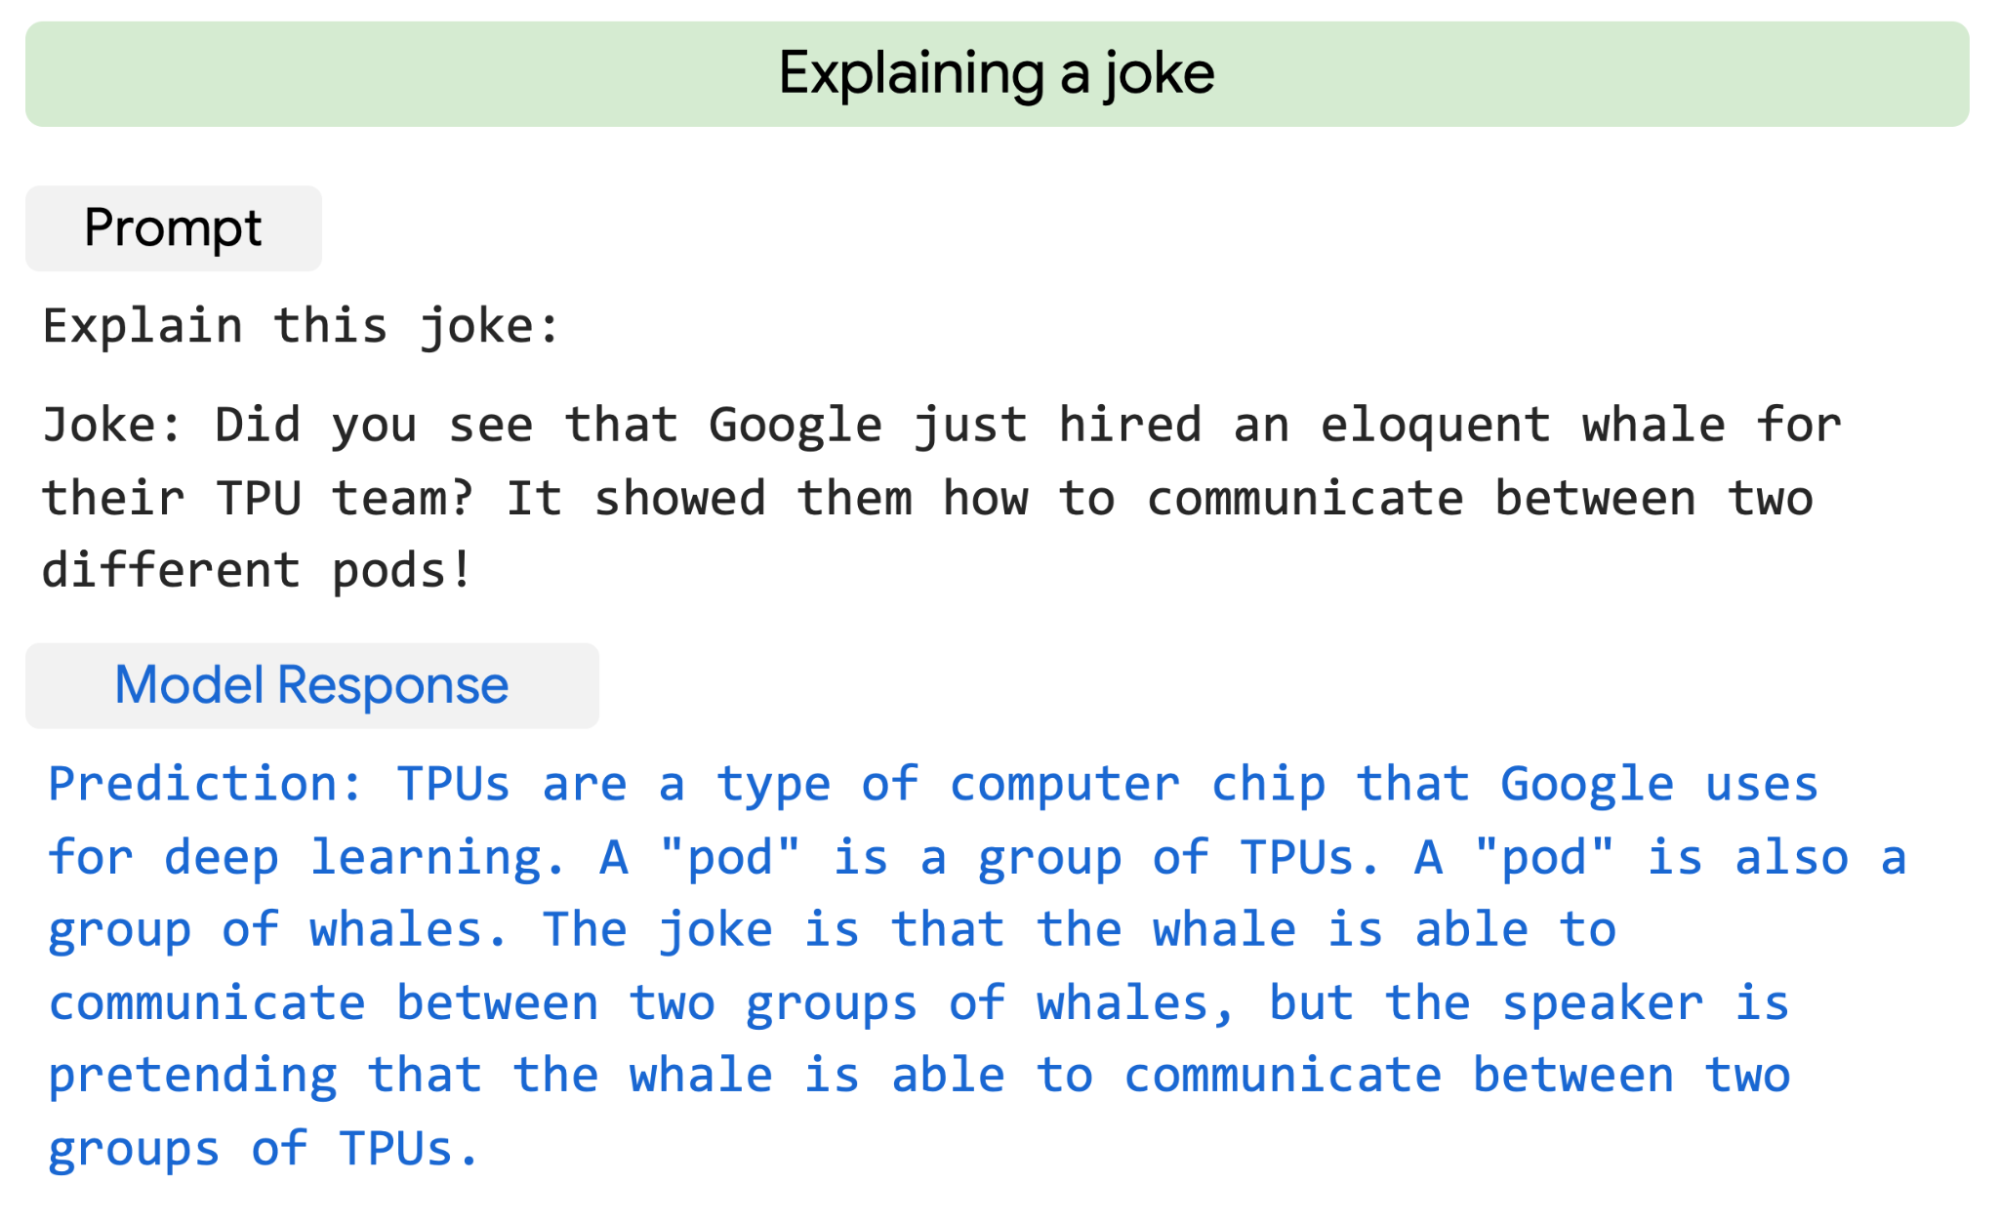

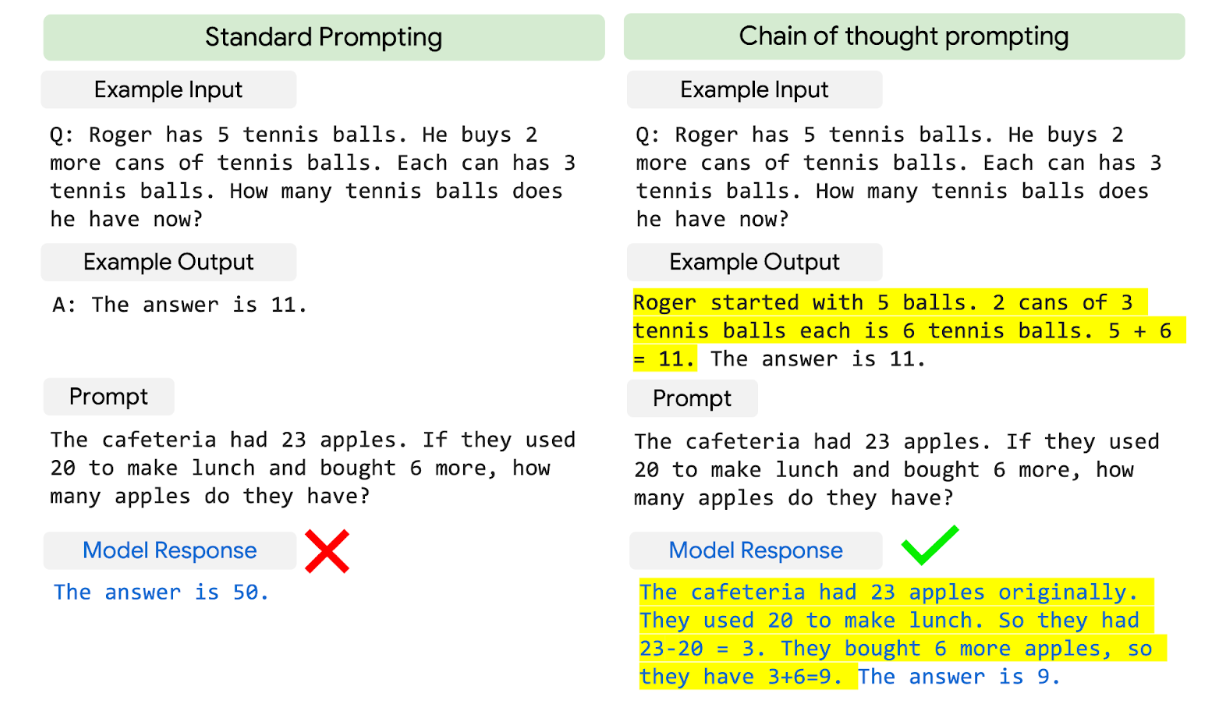

### Size matters

Large neural networks exhibit emergent behavior that simply cannot be studied with smaller networks. It is not possible to observe these emergent behaviors in smaller neural networks.

10<sup>20</sup> is 100 billion billion.

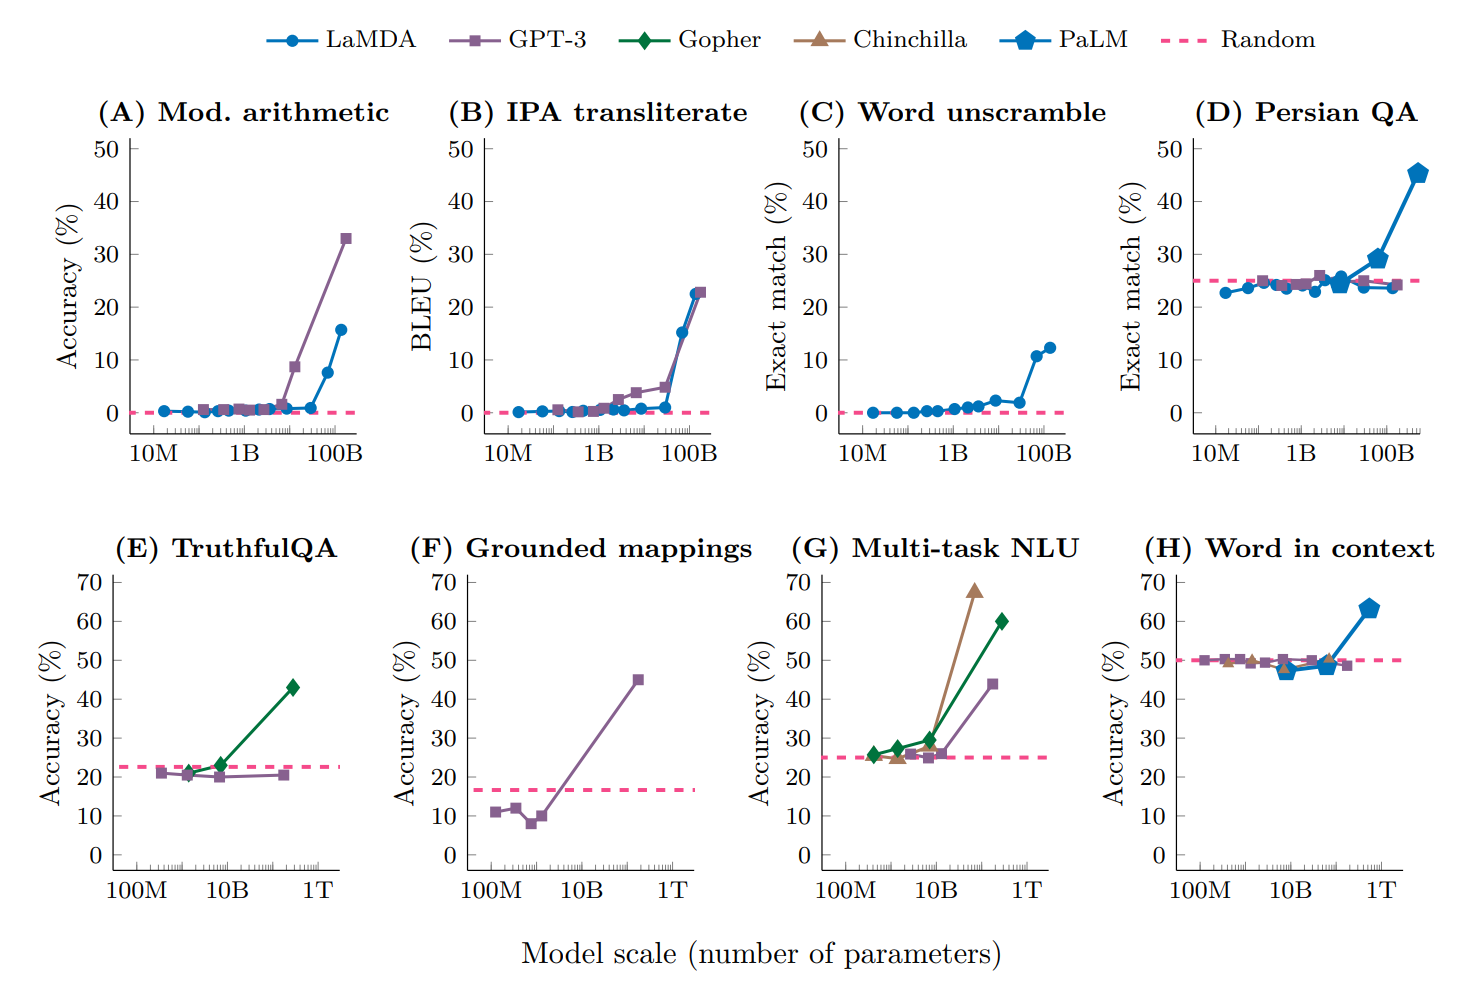

### Architecture

Transformers use a technique called self-attention, but most of the parameters in a transformer model are devoted to run-of-the-mill fully connected feed forward layers:

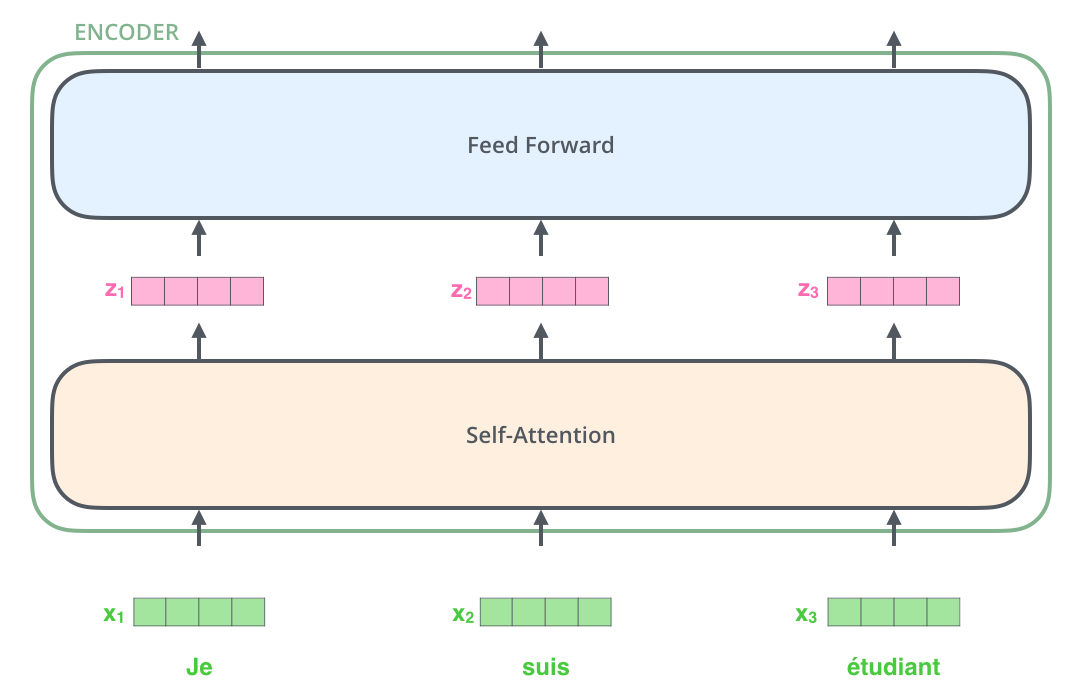

### Multi-headed self-attention

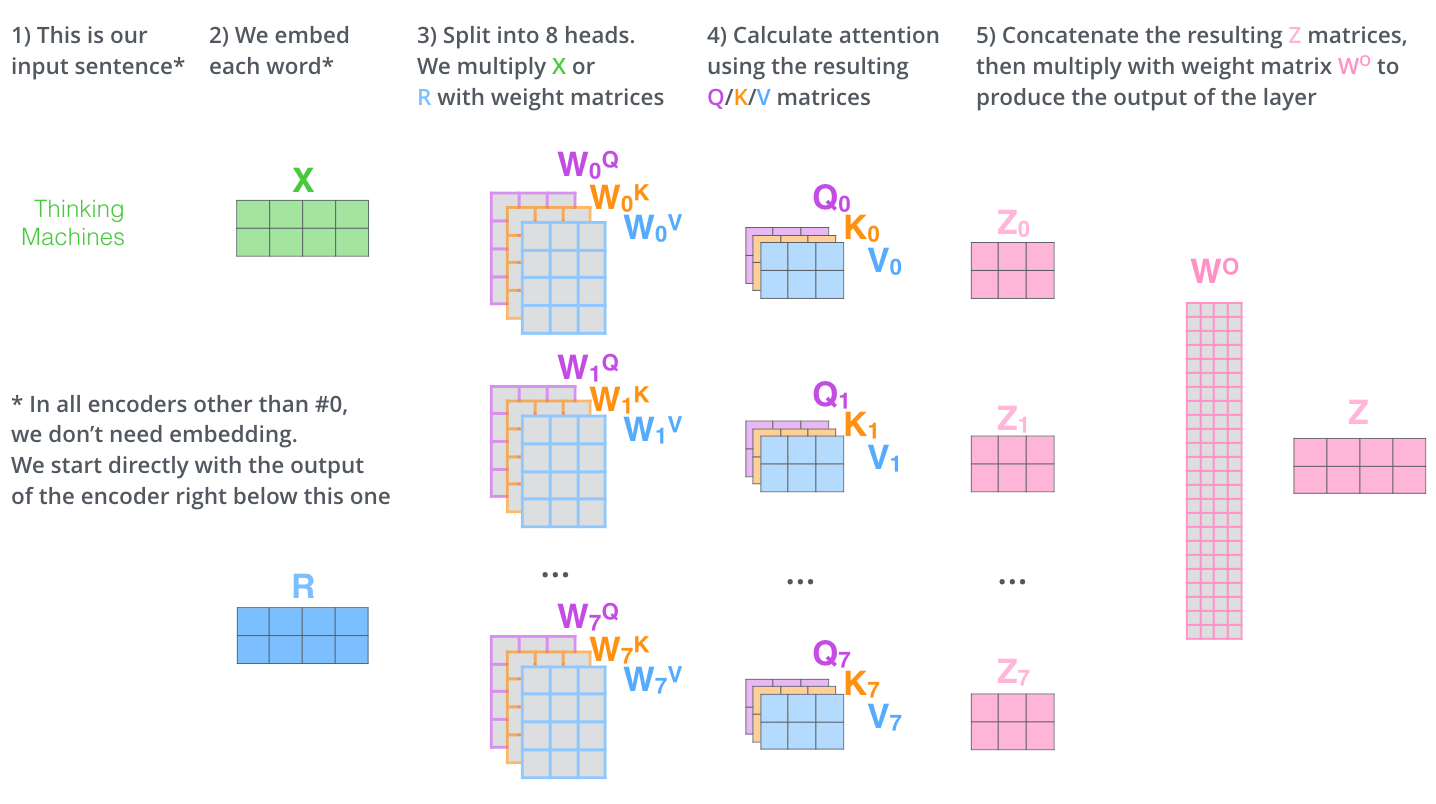

## Lexical chunking

Usage-based theories of human language argue that lexical chunking is an essential component of language processing.

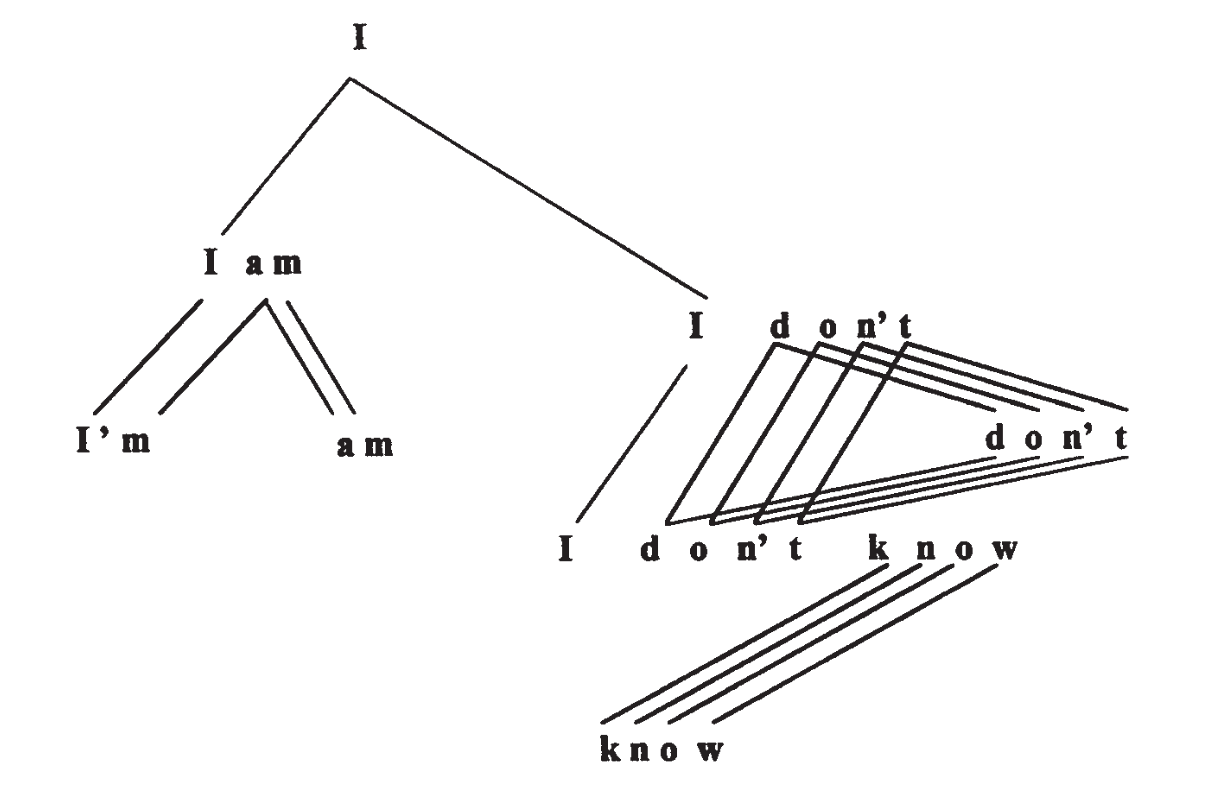

But it does not look like transformers chunk at all! They receive a fixed length input and produce a fixed length output (usually of the same dimensionality as the input). The architecture is not designed to allow for chunking, and yet, transformers seem to process human language quite well.

Do transformers chunk words (in spite of their architecture) when they process language? 
 - If so, this would support a usage-based perspective of language processing that emphasizes lexical chunking.
 - If not, then it would be evidence that the competencies exhibited by transformers do not rely on lexical chunking.
 
In either case (...or if my results are inconclusive...), I hope to develop techniques for probing the state matrices of transformer models. 

## Question
Do more word-y words retain more token-specific information through the layers of the transformer blocks? Do functional words like "to" retain less token-specific information as they move through the transformer blocks?

## Method

### Data

BookCorpus is a collection of unpublished or self-published books that was used to train BERT (along with Wikipedia).

### BERT

BERT is one of the two most famous transformer-based language models. It was released by Google in 2019. It is probably the most studied and widely-used language model. The version we are using has about 100 million parameters.

In [5]:
from transformers import logging, AutoModel, AutoTokenizer
logging.set_verbosity_error()
MODEL_NAME = 'bert-base-uncased'
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME, use_fast=False)
model = AutoModel.from_pretrained(MODEL_NAME)

s = tokenizer('This is an example.', return_tensors='pt')

with torch.no_grad(): # no gradients
    hidden_states = model(**s, output_hidden_states=True)['hidden_states']

isent, itok = 0, 0

for layer in hidden_states:
    assert len(layer[isent, itok, : ]) == 768

torch.stack(hidden_states, dim=2).shape

### Model

Train a multilayer perceptron (MLP) to reverse engineer token embeddings from transformer layers.

### Statistical Analysis

Nearest-neighbor lookup

## Results

Using a simple nearest-neighbor lookup, we can take a look at the hidden state in the 12th layer of BERT for our first example.

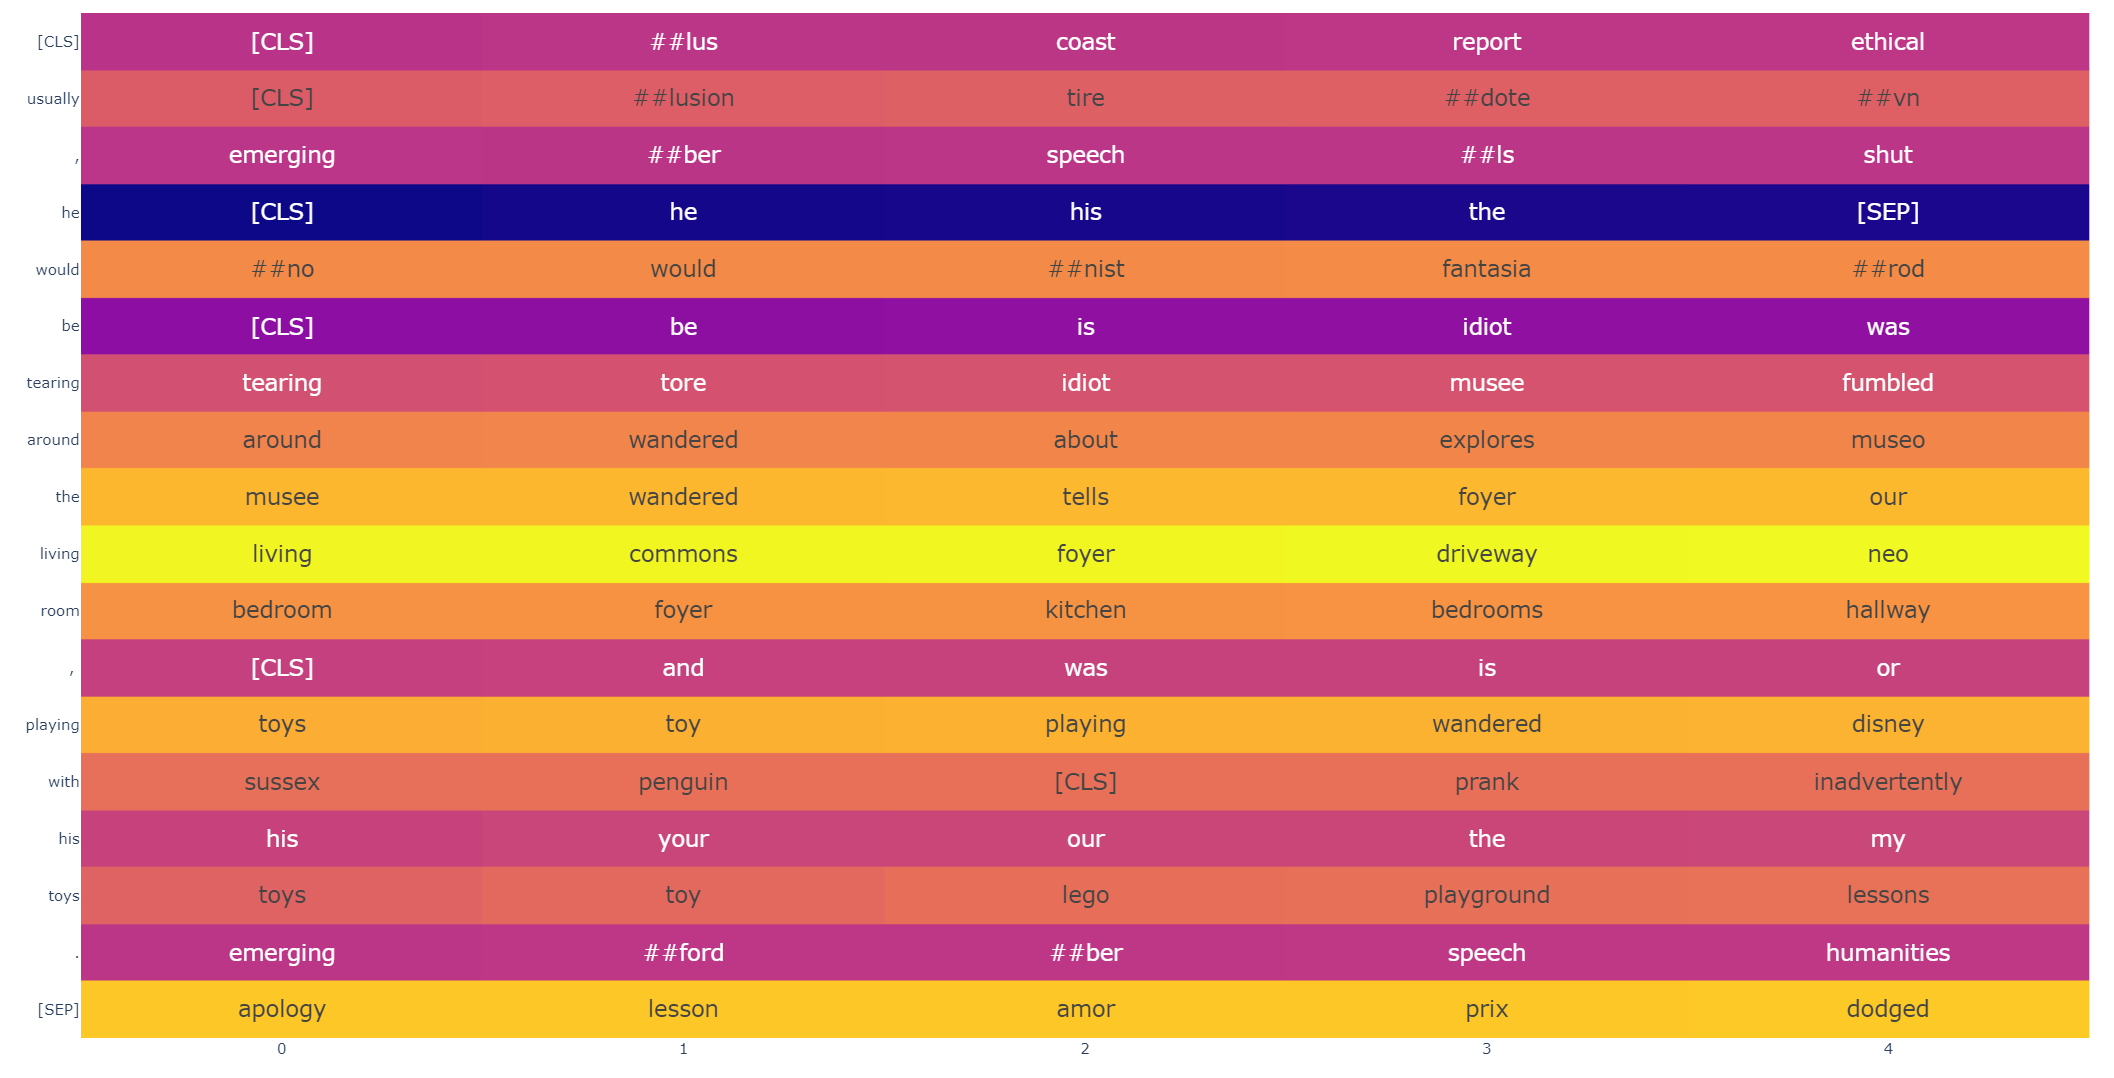

## Limitations/ TO DO

The question I really want to ask is the following, but it will take some time for me to set up this experiment:

Does the predictability of a token affect how much of its initial token embed is retained?